# Pymaceuticals Inc.
---

### Analysis

- From the box plot it can be observed that the mice treated with Capomulin and Ramicane had significantly smaller tumor size after treament on average then the other medications. 
- From the linear regression it can be observed that tumor volume is on average larger on larger mice. This is an important fact to consider especially in regards to the other plots. For example, if it is the case the the experiments conducted with Capomulin and Ramicane were completed using smaller mice than the other experiments, than this fact would counter the conclusions drawn in the previous bullet point. This hypothesis was easy to test, in the final cell under "BONUS" at the end of this notebook the average weight of the mice in each drug regimen was determined. The hypothsis that Capomulin and Ramicane used smaller mice was proven correct! This indicates that the conclusion in the first bullet point above is skewed by the fact that smaller mice were used for those two drug regimens. 
- The line chart of Capomulin on mouse_l509 shows reduction of tumor size over time while under treatment.
---
#### These data points above do not all agree with eachother, however they do all make true interpretations of the data. This goes to show that the meaning we draw from data is not always clear, and that sometimes, it requires intelligent and thorough investigation to make the apporpriate conclusions.

#### As a senior data analyst working at  Pymaceuticals, Inc. this data draws suspicions about the integrity of the company. The experiments done on Capomulin should not have been done on smaller mice compared to the other drugs. Aside from this, the analysis requested of me may not have been the ideal analysis to uncover the true results. Instead of looking at the tumor size at the end of treatment of all the mice, we should only have looked at mice that completed the full 45 days of treatment instead of including some mice that had undergone 0 days of treatment in the Boxplot data. For all the problems with it I'd say the boxplot as is, is practically useless at determining the effectivness of one of the drugs compared to the other. A better way to analyze the data my have been to look at the % change of the tumor size in each mouse over 45 days. This would have addressed the varying size of the mice aswell as the various treatment durations. However, I produced the results that were requested of me. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice by taking the length of the mouse_metadata data frame
num_mice = len(mouse_metadata)
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    #Make a dataframe of the complete merged data frame that has duplicates dropped
mouse_no_duplicates = mouse_complete.drop_duplicates(subset=['Mouse ID'])
    #Make a data frame the has only the row values of mouse_g989
mouse_g989 = mouse_no_duplicates.loc[mouse_complete['Mouse ID'] == 'g989']
    #Make a array witht the ID of mouse_g989
mouse_g989 = mouse_g989['Mouse ID'].values
mouse_g989

#Note for grader, kind of confused about what was asked of me for this cell.
#So i  made code the produced the output that was prompted. i.e. 'array(['g989'], dtype=object)'

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_g989 = mouse_complete[mouse_complete['Mouse ID'] == 'g989']
data_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_no_duplicates = mouse_complete.drop_duplicates(subset=['Mouse ID'])
mouse_no_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame by taking length of DF.
num_mice_mouse_no_duplicates = len(mouse_no_duplicates)
num_mice_mouse_no_duplicates

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Mean_Tumor_Volume = mouse_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = mouse_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Variance_Tumor_Volume = mouse_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
StdDev_Tumor_Volume = mouse_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
StdErr_Tumor_Volume = mouse_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({'Mean Tumor Volume': Mean_Tumor_Volume,
                                   'Median Tumor Volume': Median_Tumor_Volume,
                                   'Tumor Volume Variance': Variance_Tumor_Volume,
                                   'Tumor Volume Std. Dev.': StdDev_Tumor_Volume,
                                   'Tumor Volume Std. Err.': StdErr_Tumor_Volume,
                                   })
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = mouse_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

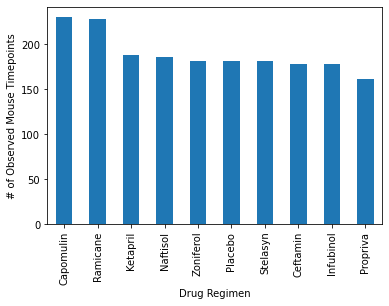

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
    #Creates a Series that counts the number of timepoints for each drung regimen
num_timepoints_per_drug = mouse_complete.groupby('Drug Regimen')['Timepoint'].count()
    #Sorts the data from most to least timepoints
num_timepoints_per_drug_Sorted = num_timepoints_per_drug.sort_values(ascending=False)
    #creates a plot using the index of the series as x values and the timepoints counts as the y values
PdTimepointBarChart = num_timepoints_per_drug_Sorted.plot.bar()
    #adds y label to plot
PdTimepointBarChart.set_ylabel('# of Observed Mouse Timepoints')
    #prints plot
plt.show()

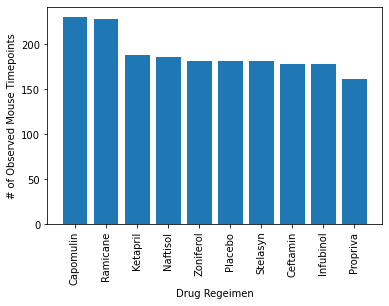

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
    #Uses the sorted series from the last cell to create a plot 
    #using the index of the series as x values and the timepoints counts as the y values
plt.bar(num_timepoints_per_drug_Sorted.index, num_timepoints_per_drug_Sorted)
    #adds x label
plt.xlabel('Drug Regeimen')
    #adds y label
plt.ylabel('# of Observed Mouse Timepoints')
    #turns x labels 90 degrees to help readable of the plot
plt.xticks(rotation=90)
    #prints plot
plt.show()

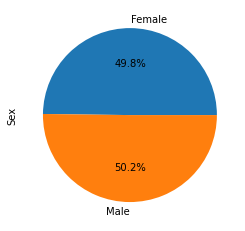

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
    #Make series of two rows: Male Female. The index is the sex and the values are the count of male or female
num_mice_by_sex = mouse_no_duplicates.groupby('Sex')['Mouse ID'].count()
num_mice_by_sex.name = 'Sex'
# Make plot, set to display percentages to 1 decimal point
SexPiePandas = num_mice_by_sex.plot.pie(autopct ='%.1f%%')
#show Plot
plt.show()

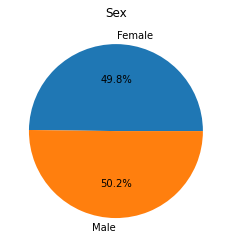

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
    #Use same series from before, set labels and display percentages to 1 decimal point using plt.
plt.pie(num_mice_by_sex,autopct='%.1f%%',labels = ['Female','Male'])
    #Set title
plt.title('Sex')
#show Plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
######## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
########Capomulin, Ramicane, Infubinol, and Ceftamin

######## Start by getting the last (greatest) timepoint for each mouse

######## Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# I think i found a better way to complete this part of the assignment. I sorted the mouse_complete df
# by Timepoint in descending order. Then use .drop_duplicates. This resulted in a copy of the complete
# mouse dataframe that included no duplicate mice but had the last time point row for each mouse.
# We can use this dataframe to complete the next section

mouse_timepoint_sort_descending = mouse_complete.sort_values(by='Timepoint', ascending = False)

mouse_timepoint_sort_descending_no_duplicates = mouse_timepoint_sort_descending.drop_duplicates(subset='Mouse ID')

mouse_timepoint_sort_descending_no_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,b879,45,72.555239,2,Stelasyn,Female,4,26
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1798,c766,45,69.823146,4,Placebo,Female,13,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
194,b447,0,45.000000,0,Ceftamin,Male,2,30
222,t573,0,45.000000,0,Ceftamin,Female,15,27
155,l872,0,45.000000,0,Placebo,Male,19,30
135,d133,0,45.000000,0,Zoniferol,Male,5,30


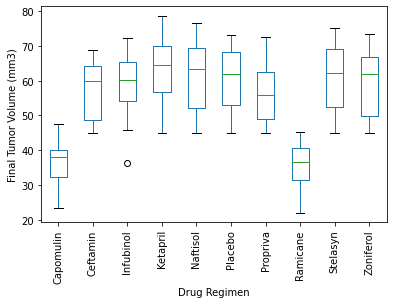

In [14]:
##### Put treatments into a list for for loop (and later for plot labels)

##### Create empty list to fill with tumor vol data (for plotting)

##### Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
#####     Locate the rows which contain mice on each drug and get the tumor volumes
    
#####     add subset 

#####     Determine outliers using upper and lower bounds


# I could have complete it the way it was suggested but I found this solution to be more elegant in producing the box plot.
# The suggestions seemed convoluted and unnessary and the example output plot did not included all the drug regimens which
# confused me. Here is my solution to create the box plot:

## Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Make Dictionary incuding lists of drug regimens and final tumor volumes for each mouse.
DrugRegimenVsFinalTumorSizeDictionary = {
    'Drug Regimen': mouse_timepoint_sort_descending_no_duplicates['Drug Regimen'].tolist(),
    'Final Tumor Volume (mm3)': mouse_timepoint_sort_descending_no_duplicates['Tumor Volume (mm3)'].tolist()
}
# Make data frame from the dictionary
DrugRegimenVsFinalTumorSizeDF = pd.DataFrame(DrugRegimenVsFinalTumorSizeDictionary)
# Make box plot from the Data Frame. set by='Drug Regimen' to group the tumor volumes by the drug regimen. 
# grid=False removes ugly gridlines
DrugSizeBoxplot = DrugRegimenVsFinalTumorSizeDF.boxplot(column=None,by='Drug Regimen', grid=False)
# Makes x labels fit sideways
plt.xticks(rotation=90)
# Sets y axis title
plt.ylabel('Final Tumor Volume (mm3)')
# Sets x axis title
plt.xlabel('Drug Regimen')
# removes default plot title
plt.title('')
# removes other default plot title
plt.suptitle('')
# Shows box plot
plt.show()

## Line and Scatter Plots

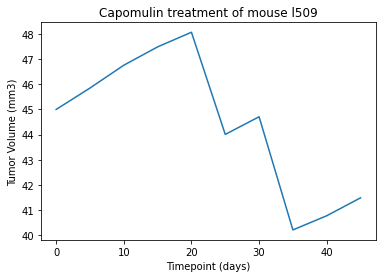

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Make a data from by isolating the complete data from mouse l509
data_l509 = mouse_complete[mouse_complete['Mouse ID'] == 'l509']

# Male line plot from the desired columns of the data_l509 data frame
plt.plot(data_l509['Timepoint'],data_l509['Tumor Volume (mm3)'])
# Set plot title
plt.title('Capomulin treatment of mouse l509')
# Set y label
plt.ylabel('Tumor Volume (mm3)')
# Set x label
plt.xlabel('Timepoint (days)')
# Show plot
plt.show()

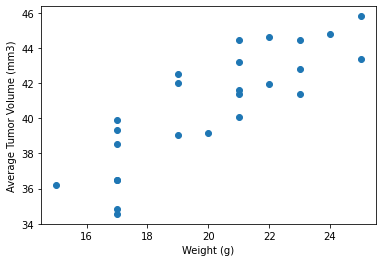

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# New Data frame containing all data under Drug Reginmen: Capomulin
Data_Capomulin = mouse_complete[mouse_complete['Drug Regimen'] == 'Capomulin']
# Makes a series using groupby that has the average tumor volume of each mouse across each of their own respective time points.
AverageTumorVolumeByMouse = Data_Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Rename series name to average tumor volume (mm3) (of each rat)
AverageTumorVolumeByMouse.rename('Avg Tumor Vol (mm3)', inplace = True)
# New Data frame containing data under Drug regimen for each of the 249 unique mice only
Data_Capomulin_no_duplicates = mouse_no_duplicates[mouse_no_duplicates['Drug Regimen'] == 'Capomulin']
# Uses merge to append Average tumor volume to Data_Capomulin_no_duplicates. Now I have a data frame that includes mouse weight and Avg tumor vol.
Data_Capomulin_no_duplicates_AvgWeightApended = pd.merge(Data_Capomulin_no_duplicates, AverageTumorVolumeByMouse, how="left", on=["Mouse ID", "Mouse ID"])

# Create scatter plot using weight and avg tumor size columns from Data_Capomulin_no_duplicates_AvgWeightApended
plt.scatter(Data_Capomulin_no_duplicates_AvgWeightApended['Weight (g)'],Data_Capomulin_no_duplicates_AvgWeightApended['Avg Tumor Vol (mm3)'])
# Add y label
plt.ylabel('Average Tumor Volume (mm3)')
# Add x label
plt.xlabel('Weight (g)')
# show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


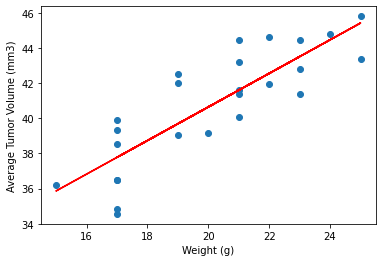

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Re-generate scatter plot from previous cell
plt.scatter(Data_Capomulin_no_duplicates_AvgWeightApended['Weight (g)'],Data_Capomulin_no_duplicates_AvgWeightApended['Avg Tumor Vol (mm3)'])
# Use scipy st.lingregress to get the values of regression i.e. slope,intercept, r_value, p_value, std_err
slope, intercept, r_value, p_value, std_err = st.linregress(Data_Capomulin_no_duplicates_AvgWeightApended['Weight (g)'],Data_Capomulin_no_duplicates_AvgWeightApended['Avg Tumor Vol (mm3)'])
# Set x values to represent the x coordinates for the regression line
x_values = Data_Capomulin_no_duplicates_AvgWeightApended['Weight (g)']
# create y values of the regression line from the variables given by st.linregress 
y_values = slope * x_values + intercept
# Add regression line from x and y values, make it red
plt.plot(x_values, y_values, color='red')
# Add y label
plt.ylabel('Average Tumor Volume (mm3)')
# Add x label
plt.xlabel('Weight (g)')
# Create string to tell the r value
print(f"The correlation between mouse weight and the average tumor volume is {r_value:.2f}")
# show plot
plt.show()

## Bonus:

In [19]:
# Averages the weight of each mouse by drug regimen.
mouse_no_duplicates.groupby('Drug Regimen')['Weight (g)'].mean()

Drug Regimen
Capomulin    20.120
Ceftamin     27.400
Infubinol    27.320
Ketapril     28.080
Naftisol     27.240
Placebo      28.040
Propriva     27.240
Ramicane     20.000
Stelasyn     27.875
Zoniferol    27.920
Name: Weight (g), dtype: float64